In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import statsmodels.api as sm
import statistics
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Read csv file
df = pd.read_csv('/content/churn_clean.csv')

In [4]:
#Check the column names 
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [5]:
# Rename surverys to approiate name
df.rename(columns={
    'Item1': 'Timely response',
    'Item2': 'Timely fixes',
    'Item3': 'Timely replacements',
    'Item4': 'Reliability',
    'Item5': 'Options ',
    'Item6': 'Respectful response',
    'Item7': 'Courteous exchange',
    'Item8': 'Evidence of active listening'
}, inplace=True)

In [6]:
# Check if survey items updated name
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely response', 'Timely fixes',
       'Timely replacements', 'Reliability', 'Options ', 'Respectful response',
       'Courteous exchange', 'Evidence of active listening'],
      dtype='object')

In [7]:
# See number of columns and records
df.shape

(10000, 50)

In [8]:
# Get count of all missing or null values in dataset
df.isnull().sum()

CaseOrder                       0
Customer_id                     0
Interaction                     0
UID                             0
City                            0
State                           0
County                          0
Zip                             0
Lat                             0
Lng                             0
Population                      0
Area                            0
TimeZone                        0
Job                             0
Children                        0
Age                             0
Income                          0
Marital                         0
Gender                          0
Churn                           0
Outage_sec_perweek              0
Email                           0
Contacts                        0
Yearly_equip_failure            0
Techie                          0
Contract                        0
Port_modem                      0
Tablet                          0
InternetService                 0
Phone         

In [9]:
#Get Stats of dataset 
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely response,Timely fixes,Timely replacements,Reliability,Options,Respectful response,Courteous exchange,Evidence of active listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [10]:
# Drop unusable columns
df.drop(columns=[
    'CaseOrder', 'Customer_id', 'Interaction', 'UID',
    'City', 'State', 'County', 'Zip', 'Lat','Lng',
    'Population', 'Area', 'TimeZone', 'Job', 'Marital', 'PaymentMethod'
], inplace=True)

In [11]:
df.columns

Index(['Children', 'Age', 'Income', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely response', 'Timely fixes',
       'Timely replacements', 'Reliability', 'Options ', 'Respectful response',
       'Courteous exchange', 'Evidence of active listening'],
      dtype='object')

<function matplotlib.pyplot.tight_layout>

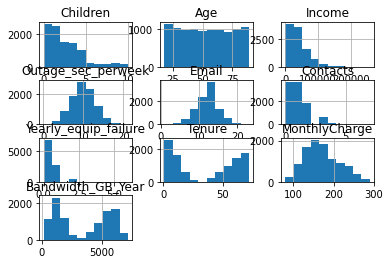

In [12]:
# Univariate Stats
# Contiuous variablse plot in histogram

df[[
    'Children', 'Age', 'Income', 'Outage_sec_perweek',
    'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure',
    'MonthlyCharge', 'Bandwidth_GB_Year'
    ]].hist()

plt.tight_layout

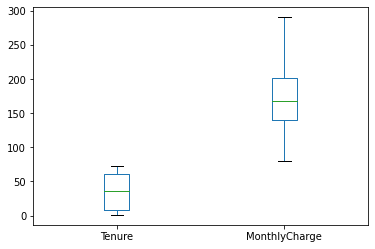

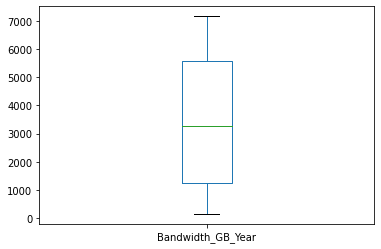

In [13]:
# Boxplot for a few continuous variables and outliers
df[['Tenure', 'MonthlyCharge']].plot.box()
df[['Bandwidth_GB_Year']].plot.box()
# Dont see any outliers but doesnt mean there isnt because we didnt check all variables

Text(0.5, 0, 'Independent')

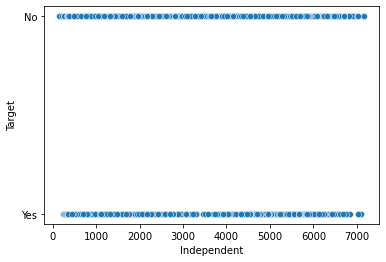

In [14]:
# Bivariate Stats
# Linear relationships
df[['Bandwidth_GB_Year', 'Churn']]
sns.scatterplot(x="Bandwidth_GB_Year", y="Churn", data=df, legend="auto")
plt.ylabel('Target')
plt.xlabel('Independent')


Text(0.5, 0, 'Independent')

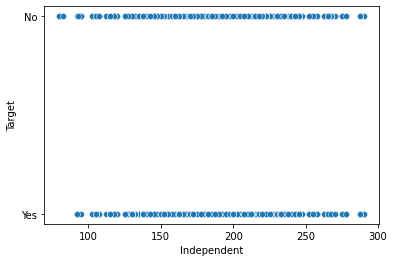

In [15]:
df[['MonthlyCharge', 'Churn']]
sns.scatterplot(x="MonthlyCharge", y="Churn", data=df, legend="auto")
plt.ylabel('Target')
plt.xlabel('Independent')

Text(0.5, 0, 'Independent')

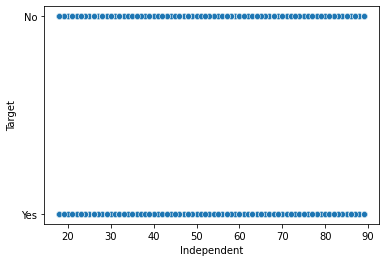

In [16]:
df[['Age', 'Churn']]
sns.scatterplot(x="Age", y="Churn", data=df, legend="auto")
plt.ylabel('Target')
plt.xlabel('Independent')

Text(0.5, 0, 'Independent')

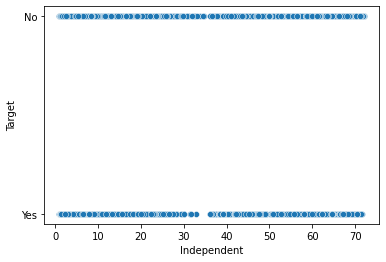

In [17]:
df[['Tenure', 'Churn']]
sns.scatterplot(x="Tenure", y="Churn", data=df, legend="auto")
plt.ylabel('Target')
plt.xlabel('Independent')

Text(0.5, 0, 'Independent')

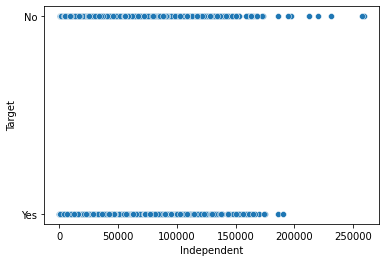

In [18]:
df[['Income', 'Churn']]
sns.scatterplot(x="Income", y="Churn", data=df, legend="auto")
plt.ylabel('Target')
plt.xlabel('Independent')

In [19]:
#Replace Churn with numerical values of 1, 0
df.Churn.replace({"Yes":1, "No":0}, inplace=True)

In [20]:
#Get dummy variables for all categorical columns
df_dc = pd.get_dummies(df, drop_first=True)

In [21]:
df_dc.columns

Index(['Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely response', 'Timely fixes',
       'Timely replacements', 'Reliability', 'Options ', 'Respectful response',
       'Courteous exchange', 'Evidence of active listening', 'Gender_Male',
       'Gender_Nonbinary', 'Techie_Yes', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes',
       'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes'],
      dtype='object')

In [22]:
#Save a clean data set 
df_dc.to_csv('prepared_data_task_2.csv')

In [23]:
#Develop stats model
#Model will include only variables that are not dummy
#That will be continuous variables and survey variables 
df_dc['intercept']= 1;
log_model = sm.Logit(df_dc['Churn'], df_dc[[
                                         'Children', 'Age', 'Income',
                                         'Outage_sec_perweek', 'Email',
                                         'Contacts', 'Yearly_equip_failure', 
                                         'Tenure', 'MonthlyCharge',
                                         'Bandwidth_GB_Year','Timely response', 
                                         'Timely fixes', 'Timely replacements', 
                                         'Reliability', 'Options ', 'Respectful response',
                                         'Courteous exchange', 'Evidence of active listening', 
                                         'Gender_Male', 'intercept']]).fit()
print(log_model.summary())

Optimization terminated successfully.
         Current function value: 0.319561
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.4473
Time:                        23:22:30   Log-Likelihood:                -3195.6
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Children                        -0.0982      0.016     -6.330      0.000

In [24]:
df_dc.drop(columns=['Gender_Nonbinary'], inplace=True)

In [25]:
#Create a model with all variables including dummy variables except for variable
#Gender_nonbinary
df_dc['intercept']= 1;
log_model = sm.Logit(df_dc['Churn'], df_dc[[
                                            'Children', 'Age', 'Income', 
                                            'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely response', 'Timely fixes',
       'Timely replacements', 'Reliability', 'Options ', 'Respectful response',
       'Courteous exchange', 'Evidence of active listening', 'Gender_Male',
       'Techie_Yes', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes',
       'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes',
                                          'intercept']]).fit()
print(log_model.summary())

Optimization terminated successfully.
         Current function value: 0.219475
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9964
Method:                           MLE   Df Model:                           35
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.6204
Time:                        23:22:30   Log-Likelihood:                -2194.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Children                      9.196e-05      0.126      0.001      0.999

In [26]:
# Store variables to use for a heatmap
bivariate_graph = df_dc[[
                        'Children', 'Age', 'Income', 
                        'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely response', 'Timely fixes',
       'Timely replacements', 'Reliability', 'Options ', 'Respectful response',
       'Courteous exchange', 'Evidence of active listening', 'Gender_Male',
       'Churn' 
]]

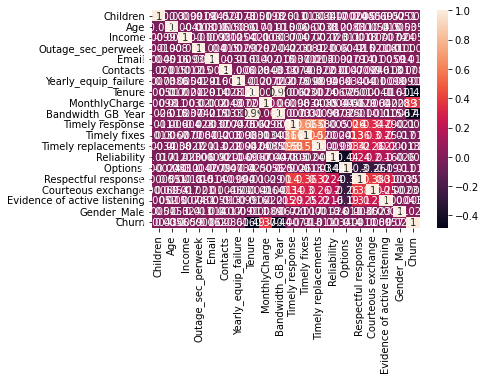

In [27]:
# Create heatmap to see correlation 
sns.heatmap(bivariate_graph.corr(), annot=True)
plt.show()

In [28]:
# Above model was to congested reduce to continuous variables
bivariate_graph2 = df_dc[[
                        'Children', 'Age', 'Income', 
                        'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 
       'Churn' 
]]

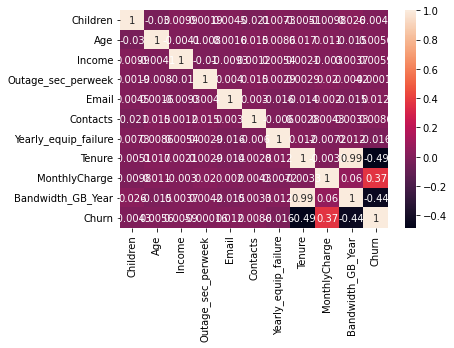

In [29]:
# Show heatmap of continuous variables
sns.heatmap(bivariate_graph2.corr(), annot=True)
plt.show()

In [30]:
# Create variables for survey question
bivariate_graph3 = df_dc[[
                        'Timely response', 'Timely fixes',
       'Timely replacements', 'Reliability', 'Options ', 'Respectful response',
       'Courteous exchange', 'Evidence of active listening',
       'Churn' 
]]

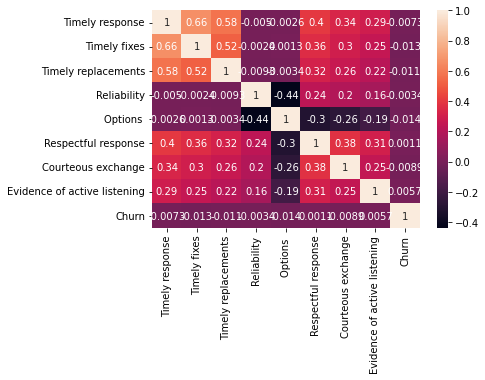

In [31]:
# Heatmap of the survey questions
sns.heatmap(bivariate_graph3.corr(), annot=True)
plt.show()

In [46]:
# Above code gives us only one feature back which is bandwidth_Gb_Year
# But need more then this so lets try step forward selection
X=df_dc.drop('Churn',axis=1)
y=df_dc['Churn']

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

LR = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.3, random_state = 0)
sfs1 = sfs(LR, n_features_to_select = 10, direction='forward', scoring='r2', cv=5)
sfs1 = sfs1.fit(X_train, y_train)

In [47]:
feat_cols = list(sfs1.get_support())
print(feat_cols)

[False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, True, False, False, True, False, True, True, True, False, False, False, False]


In [42]:
X.columns
#'Tenure', 'MonthlyCharge', 'Contract_One year', 'Contract_Two Year', 
#'InternetService_Fiber Optic', 'Techie_Yes', 'Multiple_Yes', 'OnlineBackup_Yes',
#'DeviceProtection_Yes', 'TechSupport_Yes',

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Timely response', 'Timely fixes', 'Timely replacements', 'Reliability',
       'Options ', 'Respectful response', 'Courteous exchange',
       'Evidence of active listening', 'Gender_Male', 'Techie_Yes',
       'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes',
       'Tablet_Yes', 'InternetService_Fiber Optic', 'InternetService_None',
       'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'intercept'],
      dtype='object')

In [48]:
# Reduced model
df_dc['intercept']= 1;
log_model = sm.Logit(df_dc['Churn'], df_dc[[
                                           'Tenure', 'MonthlyCharge', 'Contract_One year', 
                                            'Contract_Two Year', 'InternetService_Fiber Optic', 
                                            'Techie_Yes', 'Multiple_Yes', 'OnlineBackup_Yes',
                                            'DeviceProtection_Yes', 'TechSupport_Yes',
                                          'intercept']]).fit()
print(log_model.summary())

Optimization terminated successfully.
         Current function value: 0.224732
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.6113
Time:                        23:56:35   Log-Likelihood:                -2247.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Tenure                         -0.1143      0.003    -39.279      0.000   

In [34]:
# Model Comparisons
df_ds = pd.read_csv('prepared_data_task_2.csv')


In [35]:
df_ds.drop(columns=['Gender_Nonbinary'], inplace=True)

In [36]:
reorder_ds = df_ds[[
                    'Unnamed: 0', 'Children', 'Age', 'Income', 
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely response',
       'Timely fixes', 'Timely replacements', 'Reliability', 'Options ',
       'Respectful response', 'Courteous exchange',
       'Evidence of active listening', 'Gender_Male',
       'Techie_Yes', 'Contract_One year', 'Contract_Two Year',
       'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber Optic',
       'InternetService_None', 'Phone_Yes', 'Multiple_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes','Churn'
]]

In [37]:
X=reorder_ds.iloc[:, 1:-1].values
y=reorder_ds.iloc[:, -1].values


#Split the dataset for train and testing and test size of .3 or 30% of the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Logistic Regression
log_reg_model = LogisticRegression(random_state=0, max_iter=4000)
log_reg_model.fit(X_train, y_train)

# Predict the test results
y_predictions = log_reg_model.predict(X_test)

# Matrix
con_mat = confusion_matrix(y_test, y_predictions)
print(con_mat)

# Get Accuracy
a_score = cross_val_score(estimator= log_reg_model, X= X_train, y=y_train, cv=10)
print("Accuracy is: ", a_score.mean()*100, "%")
print("Standard Deviation: ", a_score.std()*100, "%")

[[1993  208]
 [ 260  539]]
Accuracy is:  85.25714285714287 %
Standard Deviation:  2.442648278456171 %


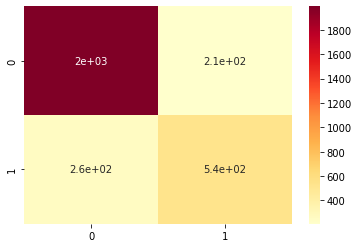

In [38]:
y_predictions_test = log_reg_model.predict(X_test)
con_mat2 = confusion_matrix(y_test, y_predictions_test)
sns.heatmap(con_mat2, annot=True, cmap='YlOrRd')

In [39]:
print(classification_report(y_test, y_predictions_test))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2201
           1       0.72      0.67      0.70       799

    accuracy                           0.84      3000
   macro avg       0.80      0.79      0.80      3000
weighted avg       0.84      0.84      0.84      3000

